In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
train = pd.read_csv('../input/train.csv')
train.shape

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv', 'embeddings']


(1306122, 3)

In [ ]:
train.head()

In [8]:
train['target'].value_counts() / train.shape[0]

0    0.93813
1    0.06187
Name: target, dtype: float64

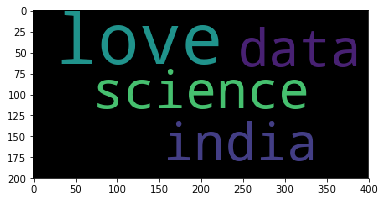

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud().generate('i love india. i love data science')
plt.imshow(wc)

In [15]:
ds = pd.Series(['first sentence', 'second sentence', 'third sent'])
' '.join(ds)

'first sentence second sentence third sent'

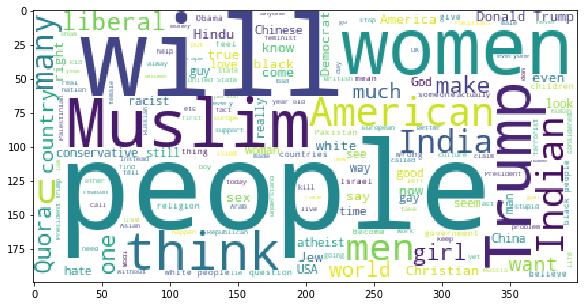

In [18]:
insincere = train[train['target'] == 1]
questions = ' '.join(insincere['question_text'])
wc = WordCloud(background_color='white').generate(questions)
plt.figure(figsize=(12,5))
plt.imshow(wc)

In [25]:
from sklearn.model_selection import train_test_split

train1, validate = train_test_split(train,
                                   test_size=0.2,
                                   random_state=1)
print(train1.shape, validate.shape)

docs = train1['question_text'].str.lower().str.replace('[^a-z ]', '')

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=200, stop_words='english').fit(docs)

(1044897, 3) (261225, 3)


In [34]:
#vectorizer.get_feature_names()[:10]
#len(vectorizer.get_feature_names())
dtm_train1 = vectorizer.transform(docs)

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=1)
model.fit(dtm_train1, train1['target'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [42]:
docs_validate = validate['question_text'].str.lower().str.replace('[^a-z ]', '')
dtm_validate = vectorizer.transform(docs_validate)
validate_pred = model.predict(dtm_validate)
validate_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(validate['target'], validate_pred))
print(f1_score(validate['target'], validate_pred))

0.9411465211982007
0.16509177799500377


In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(dtm_train1, train1['target'])
validate_pred = nb.predict(dtm_validate)
print(accuracy_score(validate['target'], validate_pred))
print(f1_score(validate['target'], validate_pred))

0.9309943535266533
0.5286580901579333


In [50]:
test = pd.read_csv('../input/test.csv')
#print(test.shape)

docs_test = test['question_text'].str.lower().str.replace('[^a-z ]', '')
dtm_test = vectorizer.transform(docs_test)
test_pred = nb.predict(dtm_test)

In [55]:
sample_submission = pd.read_csv('../input/sample_submission.csv')
#sample_submission.head()
df_submission = pd.DataFrame({'qid': test['qid'],
                              'prediction': test_pred})
#df_submission.head()

In [56]:
df_submission.to_csv('submission.csv', index=False)